https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

# Data Cleaning

In [3]:
sns.set(style="darkgrid")

# Sort values by District

df = df.sort_values(by = 'District')

# Clean "School income estimate" by removing all dollar symbols

df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas

df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN

df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]
df = df[pd.notnull(df['Rigorous Instruction Rating'])]
df = df[pd.notnull(df['Collaborative Teachers Rating'])]
df = df[pd.notnull(df['Supportive Environment Rating'])]
df = df[pd.notnull(df['Effective School Leadership Rating'])]
df = df[pd.notnull(df['Strong Family-Community Ties Rating'])]
df = df[pd.notnull(df['Trust Rating'])]
df = df[pd.notnull(df['Student Achievement Rating'])]



# Change all "School Income Estimate" types to Float

df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats

def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

# Change grading scale froom not, approaching, meeting and exceeding target to 0, 1, 2, 3 respectively.

mapping = {'Not Meeting Target': 0, 'Approaching Target': 1, 'Meeting Target': 2, 'Exceeding Target': 3}
df = df.replace({'Rigorous Instruction Rating': mapping, 'Collaborative Teachers Rating': mapping, 'Supportive Environment Rating': mapping, 'Effective School Leadership Rating': mapping, 'Strong Family-Community Ties Rating': mapping, 'Trust Rating': mapping, 'Student Achievement Rating': mapping})

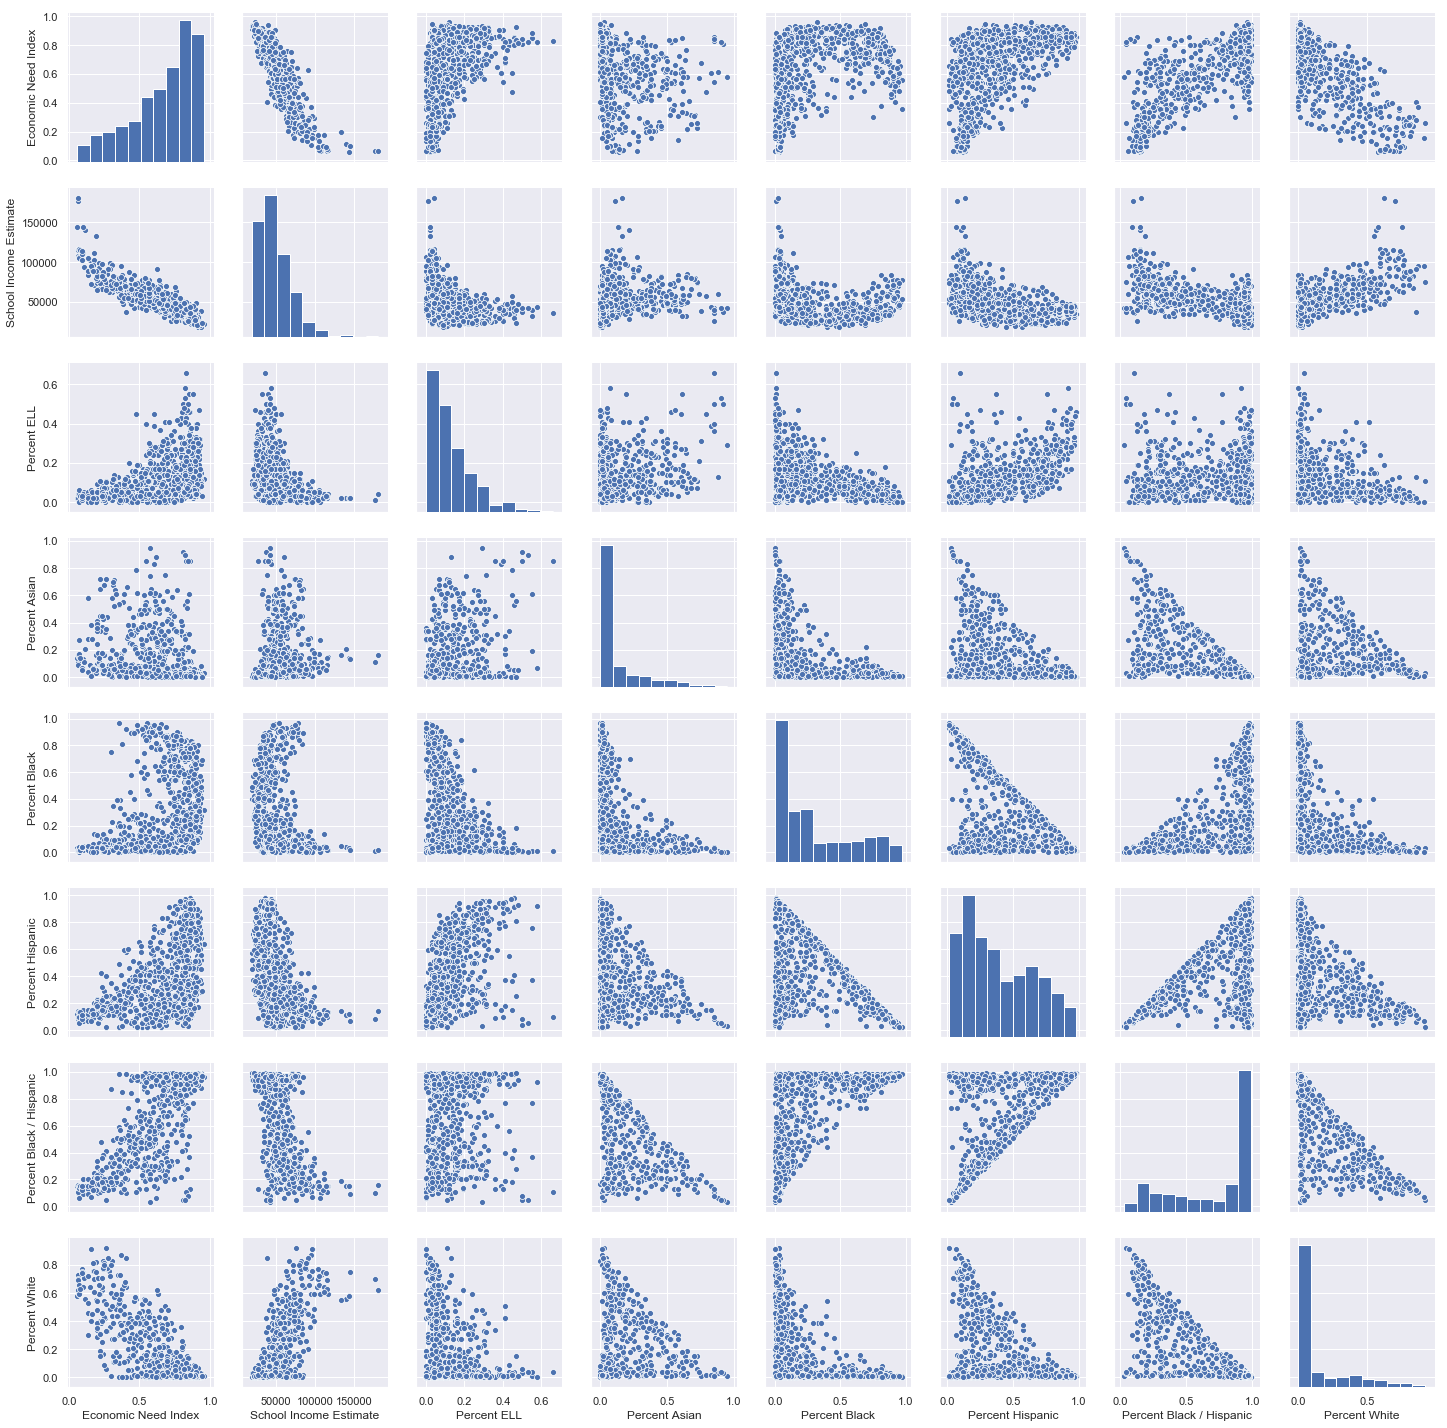

In [4]:
# Pair plot on Economic need Index against all demographic variables

g = sns.pairplot(df, vars=['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White'])

In [5]:
# Create a Pearson Correlation Matrix for Demographic Variables
student_demographic = df[['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]
student_demographic.corr()

,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.891388,0.408446,-0.325332,0.319228,0.563402,0.780150,-0.779731
School Income Estimate,-0.891388,1.000000,-0.347597,0.246096,-0.278477,-0.495459,-0.683467,0.707366
Percent ELL,0.408446,-0.347597,1.000000,0.282074,-0.443366,0.533479,0.028240,-0.241516
Percent Asian,-0.325332,0.246096,0.282074,1.000000,-0.455925,-0.302894,-0.689907,0.112635
Percent Black,0.319228,-0.278477,-0.443366,-0.455925,1.000000,-0.385474,0.625496,-0.492595
Percent Hispanic,0.563402,-0.495459,0.533479,-0.302894,-0.385474,1.000000,0.478654,-0.382532
Percent Black / Hispanic,0.780150,-0.683467,0.028240,-0.689907,0.625496,0.478654,1.000000,-0.792325
Percent White,-0.779731,0.707366,-0.241516,0.112635,-0.492595,-0.382532,-0.792325,1.000000


In [7]:
# Testing the statistical signifance of school having higher Economic Need if they have
# higher black/hispanic percentage

ENI_black_hispanic = df[['Economic Need Index', 'Percent Black / Hispanic']]
ENI_black_hispanic_high = ENI_black_hispanic[ENI_black_hispanic['Percent Black / Hispanic'] > 0.5]
ENI_black_hispanic_high = ENI_black_hispanic_high['Economic Need Index']
ENI_black_hispanic_low = ENI_black_hispanic[ENI_black_hispanic['Percent Black / Hispanic'] <= 0.5]
ENI_black_hispanic_low = ENI_black_hispanic_low['Economic Need Index']
print(stats.ttest_ind(ENI_black_hispanic_high, ENI_black_hispanic_low))
print('p-value = ' + str((7.173365090071505e-122)/2))


Ttest_indResult(statistic=28.223631130030196, pvalue=7.173365090071505e-122)
p-value = 3.5866825450357526e-122


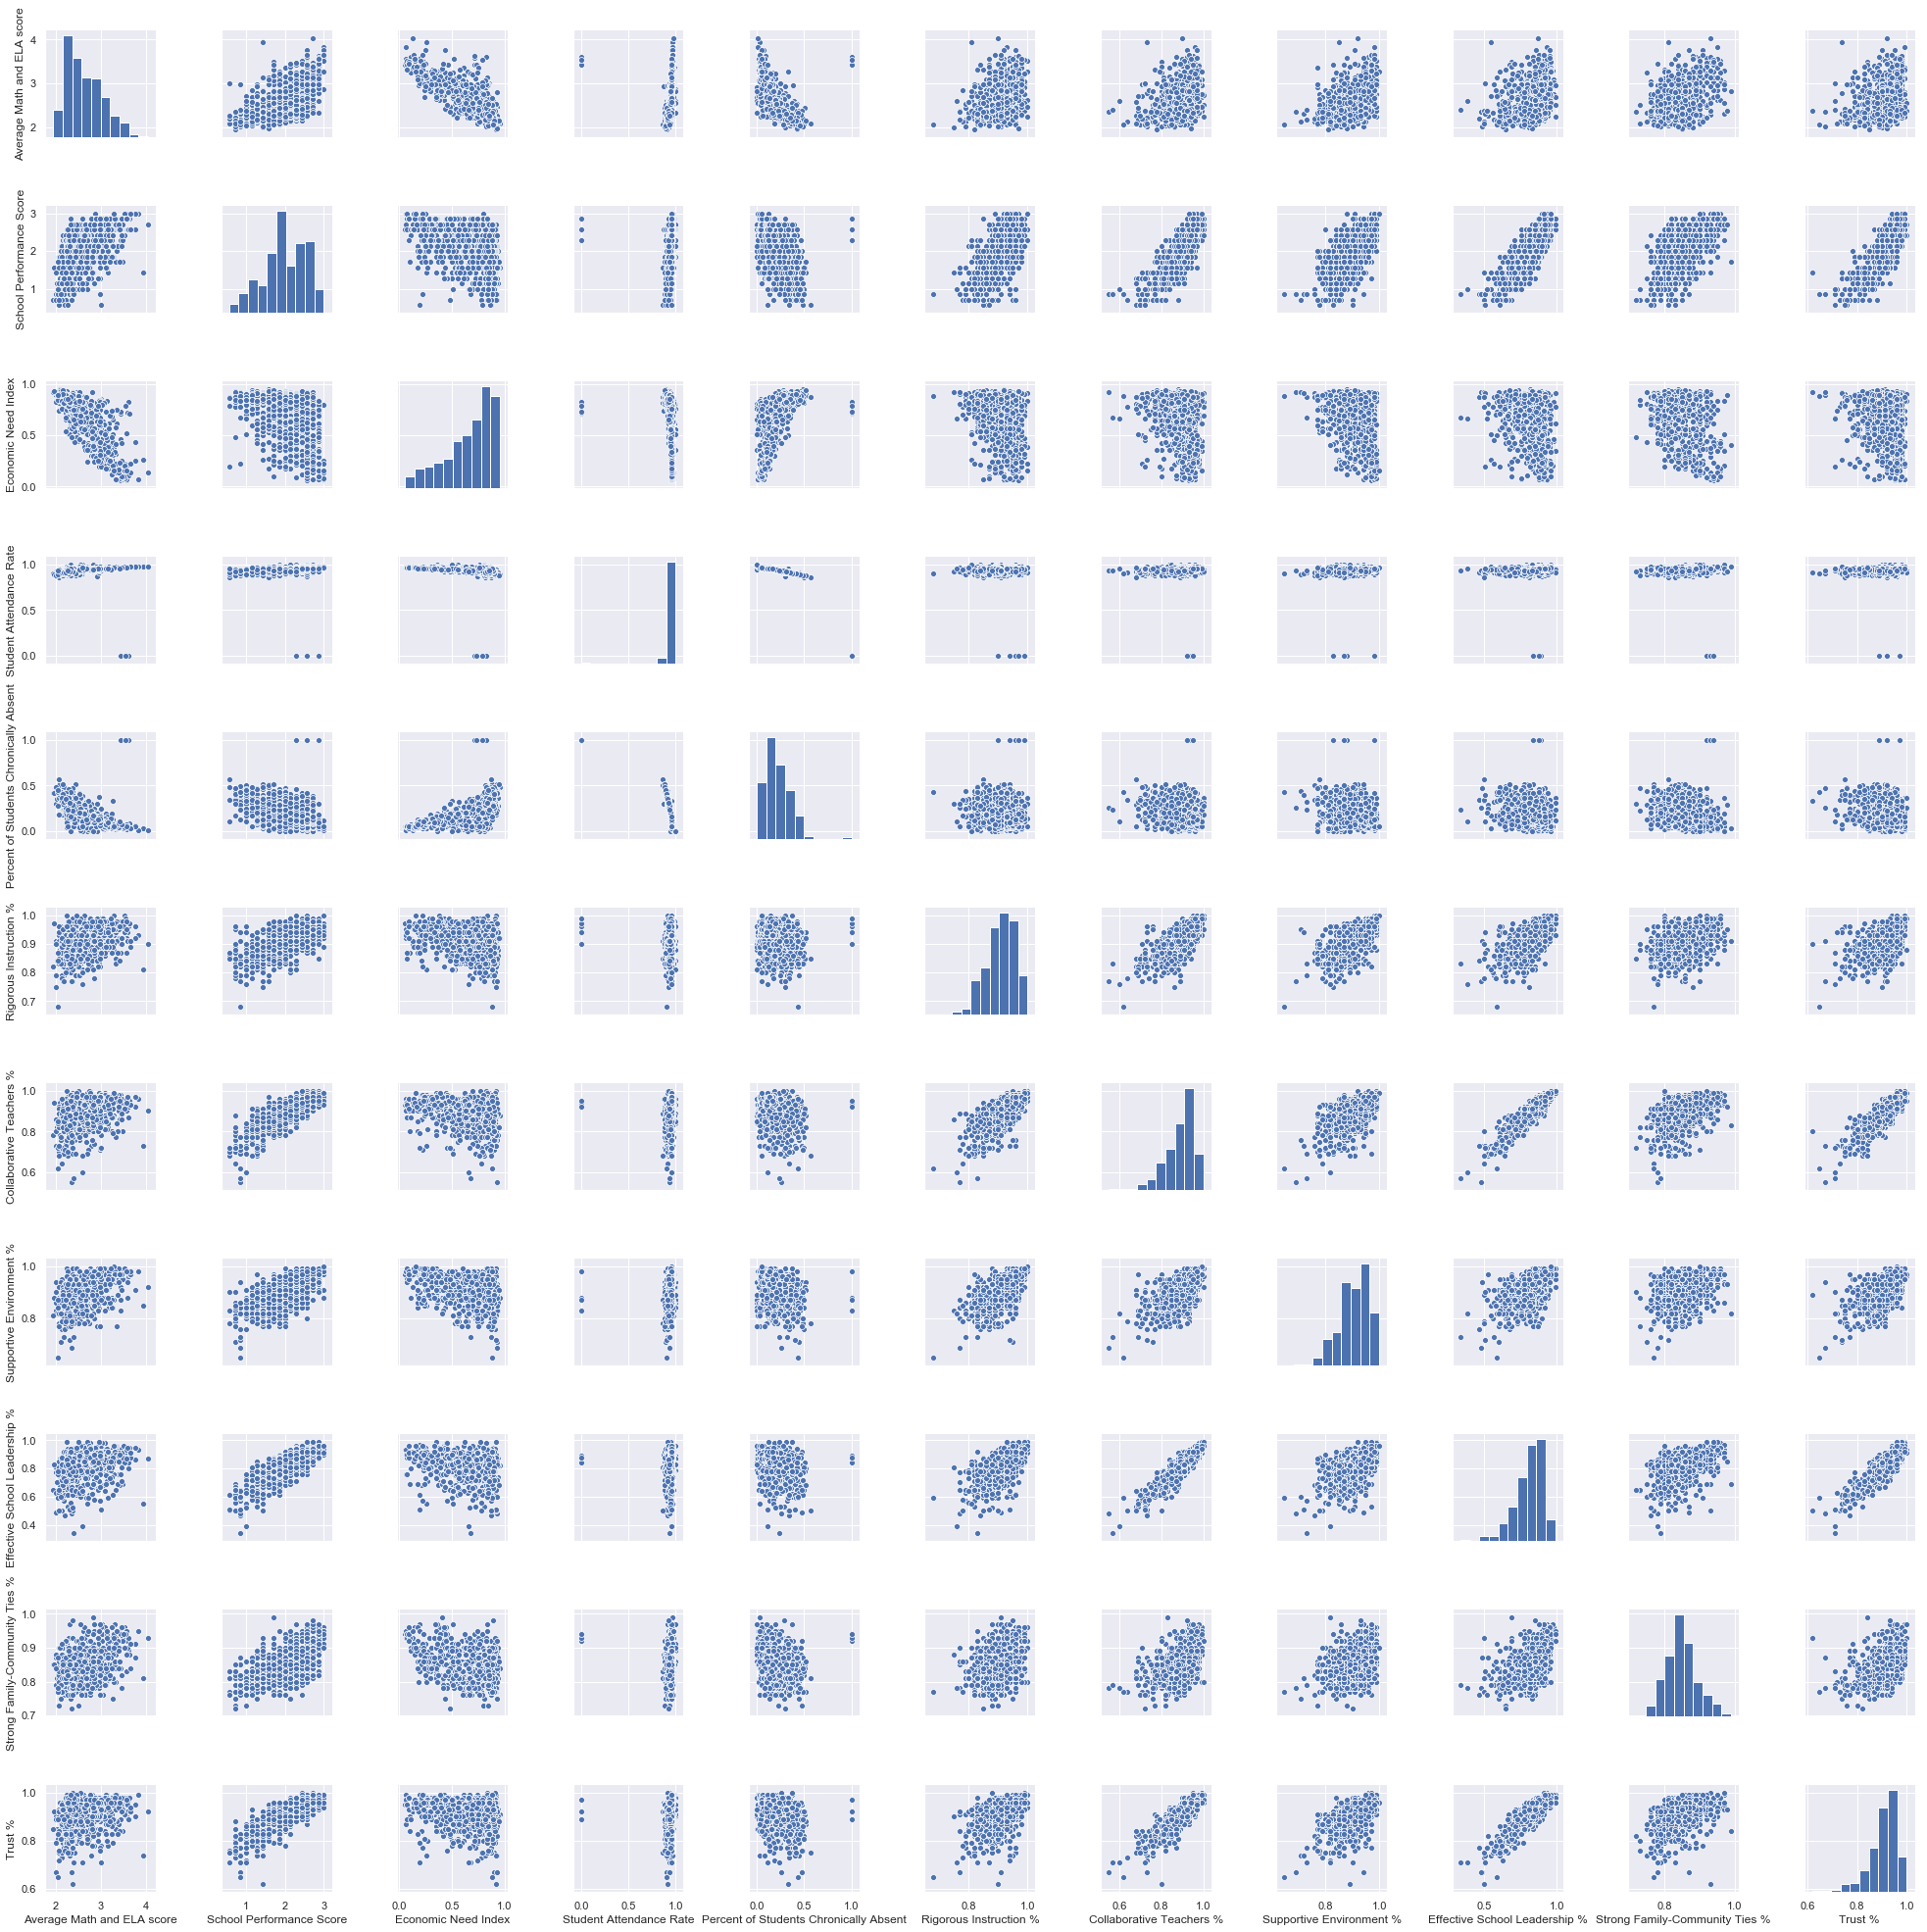

In [17]:
# Creating a new column that averages the rating of each school based on a ranking
# from 0 to 3.


df['School Performance Score'] = ((df['Rigorous Instruction Rating'] + df['Collaborative Teachers Rating'] + df['Supportive Environment Rating'] + df['Effective School Leadership Rating'] + df['Strong Family-Community Ties Rating'] + df['Trust Rating'] + df['Student Achievement Rating'])/7)

# Create Average math and ELA scores against ENI and other variables 

df['Average Math and ELA score'] = ((df['Average ELA Proficiency'] + df['Average Math Proficiency'])/2)

# Pairplot

sns.pairplot(df, vars=['Average Math and ELA score', 'School Performance Score', 'Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %'])


In [18]:
# Pearson Correlation Matrix of School performance score vs ENI and other variables

corremat = df[['Average Math and ELA score','School Performance Score', 'Economic Need Index','Rigorous Instruction %', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
corremat.corr()            
                         

,Average Math and ELA score,School Performance Score,Economic Need Index,Rigorous Instruction %,Student Attendance Rate,Percent of Students Chronically Absent,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Average Math and ELA score,1.000000,0.608517,-0.791884,0.329495,0.045455,-0.581522,0.329619,0.448046,0.329304,0.305245,0.280359
School Performance Score,0.608517,1.000000,-0.427062,0.608335,0.070240,-0.411001,0.803154,0.652771,0.813794,0.543304,0.792180
Economic Need Index,-0.791884,-0.427062,1.000000,-0.259403,-0.217135,0.618113,-0.235427,-0.358539,-0.229820,-0.326378,-0.185525
Rigorous Instruction %,0.329495,0.608335,-0.259403,1.000000,-0.026649,-0.117590,0.698796,0.615019,0.597544,0.272882,0.534260
Student Attendance Rate,0.045455,0.070240,-0.217135,-0.026649,1.000000,-0.699301,0.007920,0.087344,0.031323,-0.080103,0.033163
Percent of Students Chronically Absent,-0.581522,-0.411001,0.618113,-0.117590,-0.699301,1.000000,-0.174420,-0.277986,-0.212225,-0.125811,-0.194406
Collaborative Teachers %,0.329619,0.803154,-0.235427,0.698796,0.007920,-0.174420,1.000000,0.605833,0.908748,0.411484,0.875062
Supportive Environment %,0.448046,0.652771,-0.358539,0.615019,0.087344,-0.277986,0.605833,1.000000,0.513870,0.304628,0.584578
Effective School Leadership %,0.329304,0.813794,-0.229820,0.597544,0.031323,-0.212225,0.908748,0.513870,1.000000,0.445064,0.878539
Strong Family-Community Ties %,0.305245,0.543304,-0.326378,0.272882,-0.080103,-0.125811,0.411484,0.304628,0.445064,1.000000,0.414294


In [10]:
# Testing statistical significance of ENI based on how chronically absent students are

ENI_absent = df[['Economic Need Index', 'Percent of Students Chronically Absent']]
ENI_absent_high = ENI_absent[ENI_absent['Percent of Students Chronically Absent'] > 0.5]
ENI_absent_high = ENI_absent_high['Percent of Students Chronically Absent']
ENI_absent_low = ENI_absent[ENI_absent['Percent of Students Chronically Absent'] <= 0.5]
ENI_absent_low = ENI_absent_low['Percent of Students Chronically Absent']
print(stats.ttest_ind(ENI_absent_high, ENI_absent_low))

# Of schools with high absence rates, which variables are significantly higher

Ttest_indResult(statistic=14.44693126803112, pvalue=3.611322220567233e-42)


In [11]:
# Testing statistical significance of Average math and ela scores with ENI

score = df[['Economic Need Index', 'Average Math and ELA score']]
high_score = score[score['Economic Need Index']> 0.5]
high_score = high_score['Average Math and ELA score']
low_score = score[score['Economic Need Index']<= 0.5]
low_score = low_score['Average Math and ELA score']
print(stats.ttest_ind(high_score, low_score))

Ttest_indResult(statistic=-23.782466230187108, pvalue=8.550010803183755e-95)


In [12]:
# Testing statistical significance of Average math and ela scores with supportive environment

support = df[['Supportive Environment %', 'Average Math and ELA score']]
high_support = support[support['Supportive Environment %']> 0.91]
high_support = high_support['Average Math and ELA score']
low_support = support[support['Supportive Environment %']<= 0.91]
low_support = low_support['Average Math and ELA score']
print(stats.ttest_ind(high_support, low_support))

Ttest_indResult(statistic=12.42796199336386, pvalue=1.5840179417072458e-32)


# Features

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


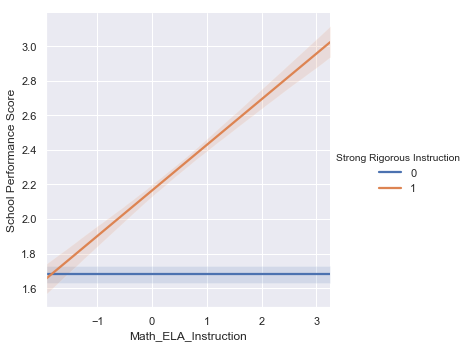

In [22]:
# 1. Percent English as a first language

features = pd.DataFrame()

features['School Name'] = df['School Name']
features['District'] = df['District']
features['Economic Need Index'] = df['Economic Need Index']
features['Percent English Speaking'] = 1 - df['Percent ELL']

# 2. Minority Feature

features['Percent Minority'] = 1 - df['Percent White']

# 3. Combine Collaborative Teachers % with Effective School leadership, Trust

means = df[['Collaborative Teachers %', 'Effective School Leadership %', 'Trust %']].mean(axis=0)
stds = df[['Collaborative Teachers %', 'Effective School Leadership %', 'Trust %']].std(axis=0)
features['Positive Environment'] = ((df[['Collaborative Teachers %', 'Effective School Leadership %', 'Trust %']] - means)/stds).mean(axis=1)

# 4. A categorical ranking of rigrorous instruction. (good or bad)

features['Strong Rigorous Instruction'] = np.where(df['Rigorous Instruction %'] >= 0.91, 1, 0)

# 5. Math and ELA Score into categorical variables (good or bad)

features['Strong Scores'] = np.where(df['Average Math and ELA score'] >= 2.55, 1, 0 )

# 6. School Performace Score into two to three categorical variables

features['School Performance Scores'] = np.where(df['School Performance Score'] >= 2.0, 1, 0 )

# 7. Feature combining School Performance Score and Avg Math and ELA score

means = df[['School Performance Score', 'Average Math and ELA score']].mean(axis=0)
stds = df[['School Performance Score', 'Average Math and ELA score']].std(axis=0)
features['School score'] = ((df[['School Performance Score', 'Average Math and ELA score']] - means)/stds).mean(axis=1)

# 8. Economic Stability variable

features['Economic Stability Index'] = 1 - df['Economic Need Index']

# 9. Combining avg ela and math scores. Done before but i think this feature is better as it captures the full variance

means = df[['Average ELA Proficiency', 'Average Math Proficiency']].mean(axis=0)
stds = df[['Average ELA Proficiency', 'Average Math Proficiency']].std(axis=0)
features['Math and ELA score'] = ((df[['Average ELA Proficiency', 'Average Math Proficiency']] - means)/stds).mean(axis=1)

# 10. Feature showing math scores and School Performance Score are based on a third variable, rigorous instruction

features['Math_ELA_Instruction'] = features['Math and ELA score'] * features['Strong Rigorous Instruction']
features['School Performance Score'] = df['School Performance Score']
sns.lmplot(x = 'Math_ELA_Instruction', y ='School Performance Score', hue = 'Strong Rigorous Instruction', data = features, scatter = False)


# Some sort of bug

